In [4]:
!pip install datasets
!pip install rouge_score

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.0 MB/s eta 0:00:00
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.24.0 requires huggingface-hub<1.0,>=0.10.0, but you have huggingface-hub 0.0.19 which is incompatible.
sentence-transformers 2.2.2 requires huggingface-hub>=0.4.0, but you have huggingface-hub 0.0.19 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable


In [7]:
import numpy as np

In [98]:
from datasets import load_from_disk
scored_dataset = load_from_disk("/scratch/hw1685/DSGA_1006_capstone/shard_0")
#/scratch/kd1860/DSGA_1006_capstone/dataset/processed_shards/shard_0
scored_dataset

Dataset({
    features: ['document', 'summary', 'rouge_scores', 'entity_counts'],
    num_rows: 1125
})

In [92]:
len(scored_dataset['document'][0])

20

In [93]:
percentage = 0.7 #percentage to keep
top = 5 # keep first t sentences 
row = scored_dataset['document'][0]
pointers = [i for i in range(len(row)) if '|||||' in row[i]] #seperate articles
scores = scored_dataset['rouge_scores'][0]
filter = []
score_splits = [sl.tolist()for sl in np.split(scores, pointers)]
for a in range(len(score_splits)):
  rest = score_splits[a][5:]
  n_leave = int(len(rest)*percentage) #leave 0.8 percent of the rest of the sentences (except top sentences)
  index_leave = sorted(range(len(rest)), key = lambda sub: rest[sub])[-n_leave:] #index of top n_leave scores
  if len(score_splits[a])>=top:
    filter.append([1]*top+[0]*len(rest))
  else:
    filter.append([1]*(len(score_splits[a])))
  for i in index_leave:
    filter[a][i+top] = 1
#print(filter)
filter = list(map(bool,sum(filter,[]))) #merge lists into one list
filtered_sentetnces = np.array(row)[filter]
filtered_scores = np.array(np.array(scores))[filter]
print(filter)
print(len(filtered_scores))

[True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True]
17


In [105]:
def filter_sentence(document):
  percentage = 0.7 #percentage to keep
  top = 5 # keep first t sentences 
  sentences = document['document']
  pointers = [i for i in range(len(sentences)) if '|||||' in sentences[i]] #seperate articles
  scores = document['rouge_scores']
  filter = []
  score_splits = [sl.tolist()for sl in np.split(scores, pointers)]
  for a in range(len(score_splits)):
    rest = score_splits[a][5:]
    n_leave = int(len(rest)*percentage) #leave 0.8 percent of the rest of the sentences (except top sentences)
    index_leave = sorted(range(len(rest)), key = lambda sub: rest[sub])[-n_leave:] #index of top n_leave scores
    if len(score_splits[a])>=top:
      filter.append([1]*top+[0]*len(rest))
    else:
      filter.append([1]*(len(score_splits[a])))
    for i in index_leave:
      filter[a][i+top] = 1
  filter = list(map(bool,sum(filter,[])))
  filtered_sentetnces = np.array(sentences)[filter]
  filtered_scores = np.array(np.array(scores))[filter]
  document['document'] = filtered_sentetnces
  document['rouge_scores'] = filtered_scores
  return document

In [95]:
small_dataset = scored_dataset.select(list(range(2)))
small_dataset

Dataset({
    features: ['document', 'summary', 'rouge_scores', 'entity_counts'],
    num_rows: 2
})

In [60]:
filtered_dataset = scored_dataset.map(filter_sentence, num_proc = 10)

#0:   0%|          | 0/113 [00:00<?, ?ex/s]

#1:   0%|          | 0/113 [00:00<?, ?ex/s]

#2:   0%|          | 0/113 [00:00<?, ?ex/s]

#3:   0%|          | 0/113 [00:00<?, ?ex/s]

#4:   0%|          | 0/113 [00:00<?, ?ex/s]

#5:   0%|          | 0/112 [00:00<?, ?ex/s]

#6:   0%|          | 0/112 [00:00<?, ?ex/s]

#7:   0%|          | 0/112 [00:00<?, ?ex/s]

#8:   0%|          | 0/112 [00:00<?, ?ex/s]

#9:   0%|          | 0/112 [00:00<?, ?ex/s]

In [99]:
filtered_dataset_7 = scored_dataset.map(filter_sentence, num_proc = 10)

#0:   0%|          | 0/113 [00:00<?, ?ex/s]

#1:   0%|          | 0/113 [00:00<?, ?ex/s]

#2:   0%|          | 0/113 [00:00<?, ?ex/s]

#3:   0%|          | 0/113 [00:00<?, ?ex/s]

#4:   0%|          | 0/113 [00:00<?, ?ex/s]

#5:   0%|          | 0/112 [00:00<?, ?ex/s]

#6:   0%|          | 0/112 [00:00<?, ?ex/s]

#7:   0%|          | 0/112 [00:00<?, ?ex/s]

#8:   0%|          | 0/112 [00:00<?, ?ex/s]

#9:   0%|          | 0/112 [00:00<?, ?ex/s]

In [106]:
filtered_dataset_6 = scored_dataset.map(filter_sentence, num_proc = 10)

#0:   0%|          | 0/113 [00:00<?, ?ex/s]

#1:   0%|          | 0/113 [00:00<?, ?ex/s]

#2:   0%|          | 0/113 [00:00<?, ?ex/s]

#3:   0%|          | 0/113 [00:00<?, ?ex/s]

#4:   0%|          | 0/113 [00:00<?, ?ex/s]

#5:   0%|          | 0/112 [00:00<?, ?ex/s]

#6:   0%|          | 0/112 [00:00<?, ?ex/s]

#7:   0%|          | 0/112 [00:00<?, ?ex/s]

#8:   0%|          | 0/112 [00:00<?, ?ex/s]

#9:   0%|          | 0/112 [00:00<?, ?ex/s]

In [97]:
filtered_dataset['document'][0]

['National Archives',
 'Yes, it’s that time again, folks.',
 'It’s the first Friday of the month, when for one ever-so-brief moment the interests of Wall Street, Washington and Main Street are all aligned on one thing: Jobs.',
 'A fresh update on the U.S. employment situation for January hits the wires at 8:30 a.m.',
 'New York time offering one of the most important snapshots on how the economy fared during the previous month.',
 'Expectations are for 203,000 new jobs to be created, according to economists polled by Dow Jones Newswires, compared to 227,000 jobs added in February.',
 'The unemployment rate is expected to hold steady at 8.3%.',
 'Here at MarketBeat HQ, we’ll be offering color commentary before and after the data crosses the wires.',
 'And while you’re here, why don’t you sign up to follow us on Twitter.',
 '||||| Employers pulled back sharply on hiring last month, a reminder that the U.S. economy may not be growing fast enough to sustain robust job growth.',
 'The unemp

In [51]:
import matplotlib.pyplot as plt

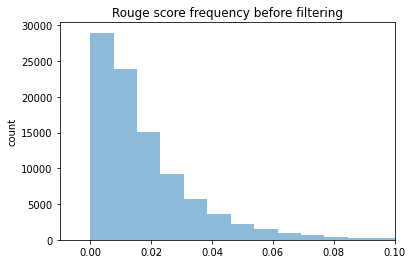

In [65]:
rouge_score_all = np.array([item for sublist in scored_dataset['rouge_scores'] for item in sublist])
plt.hist(rouge_score_all, bins=50, alpha=0.5)
plt.xlim([min(rouge_score_all)-0.01, 0.1])
plt.ylabel('count')
plt.xlabel('rouge score')
plt.title('Rouge score frequency before filtering')
plt.show()

In [80]:
len(np.array(rouge_score_all)[rouge_score_all<0.01])/len(rouge_score_all)

0.39996357832267465

In [126]:
len(np.array(rouge_score_all)[rouge_score_all<0.005])/len(rouge_score_all)

0.19595933626849205

In [127]:
#n = 0
for n in [0,1,3,4,6,7,10]:
    print(np.array(scored_dataset['document'][n])[np.array(scored_dataset['rouge_scores'][n])<0.005])

['National Archives']
['Minutes later she was unresponsive.']
['Invalid email address.' 'Please re-enter.' 'Thank you for subscribing.'
 'An error has occurred.' 'Please try again later.']
['"It was kind of wrenching."']
['Learn more']
['The panel will reconvene Monday.' 'Ellis approved the request.' 'More:'
 'But you know what?' '"I imagine they would, too."'
 'Online: https://apnews.com/8b1cea8ba9ba49f98e06c77782add2ba']
['Prosecutors opposed the delay.' 'He took no questions.'
 'sigc@express-news.net']


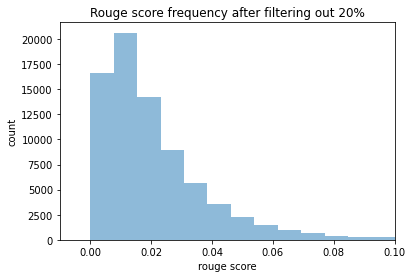

In [66]:
rouge_score_filtered = np.array([item for sublist in filtered_dataset['rouge_scores'] for item in sublist])
plt.hist(rouge_score_filtered, bins=50, alpha=0.5)
plt.xlim([min(rouge_score_filtered)-0.01, 0.1])
plt.ylabel('count')
plt.xlabel('rouge score')
plt.title('Rouge score frequency after filtering out 20%')
plt.show()

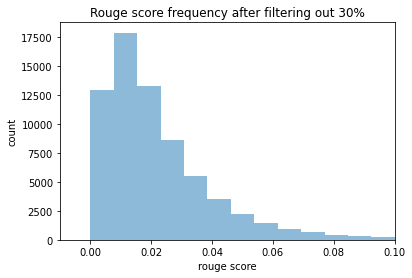

In [100]:
rouge_score_filtered7 = np.array([item for sublist in filtered_dataset_7['rouge_scores'] for item in sublist])
plt.hist(rouge_score_filtered7, bins=50, alpha=0.5)
plt.xlim([min(rouge_score_filtered7)-0.01, 0.1])
plt.ylabel('count')
plt.xlabel('rouge score')
plt.title('Rouge score frequency after filtering out 30%')
plt.show()

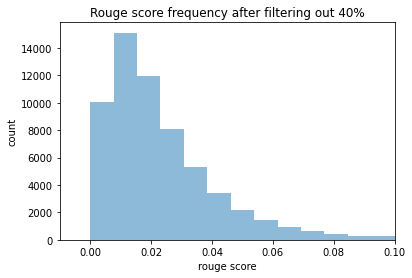

In [107]:
rouge_score_filtered6 = np.array([item for sublist in filtered_dataset_6['rouge_scores'] for item in sublist])
plt.hist(rouge_score_filtered6, bins=50, alpha=0.5)
plt.xlim([min(rouge_score_filtered6)-0.01, 0.1])
plt.ylabel('count')
plt.xlabel('rouge score')
plt.title('Rouge score frequency after filtering out 40%')
plt.show()

In [133]:
filtered_dataset['document'][6]

['Pope Francis joined the—now truly #blessed—Instagram community on Saturday, posting his first photo on the popular app.',
 '“Pray for me,” the caption says, repeated in eight other languages.',
 'The photo, posted with the handle @franciscus, shows Francis kneeling with his head bowed in prayer.',
 '“I am beginning a new journey, on Instagram, to walk with you along the path of mercy and the tenderness of God,” Francis posted on Saturday on Twitter, where he has more than 8.89 million followers.',
 '“Watching Pope Francis post his first photo to Instagram today was an incredible moment.',
 '@franciscus, welcome to the Instagram community!',
 'Your messages of humility, compassion and mercy will leave a lasting mark,” Instagram CEO and co-founder Kevin Systrom posted on Instagram on Saturday.',
 'The Brief Newsletter Sign up to receive the top stories you need to know right now.',
 'View Sample Sign Up Now \n \n Systrom met with Pope Francis at the Vatican last month to discuss the un